In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os.path

%matplotlib inline
os.environ['PATH'] = os.environ['PATH'] + ':/Library/TeX/texbin/latex'
plt.rc('text', usetex=True)

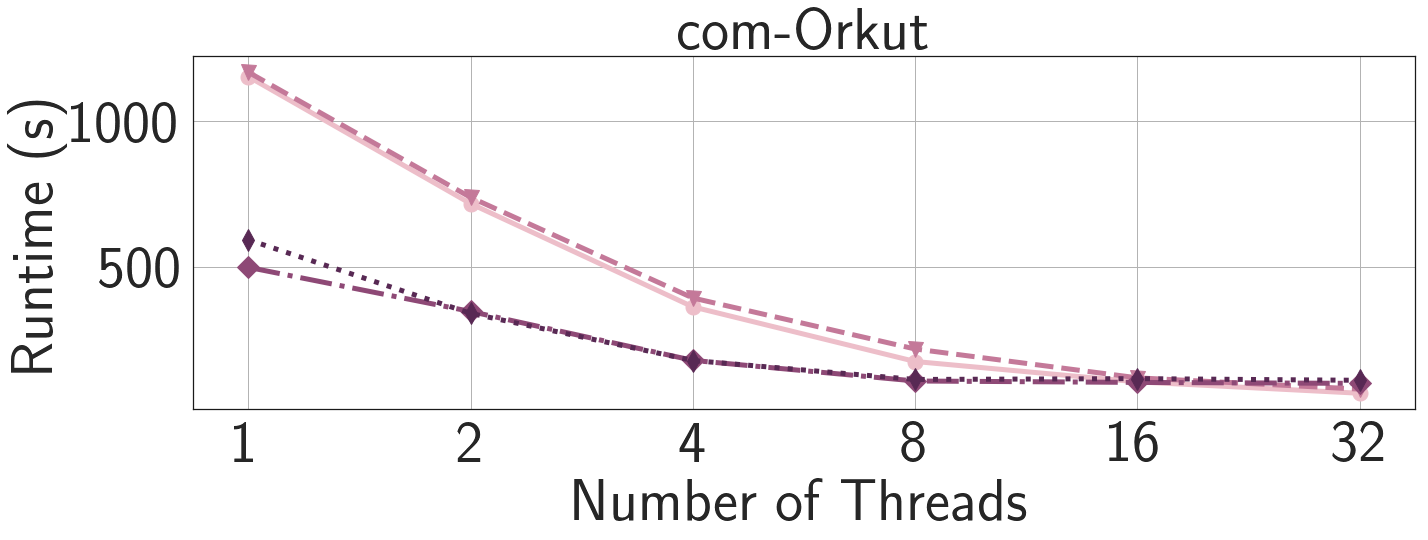

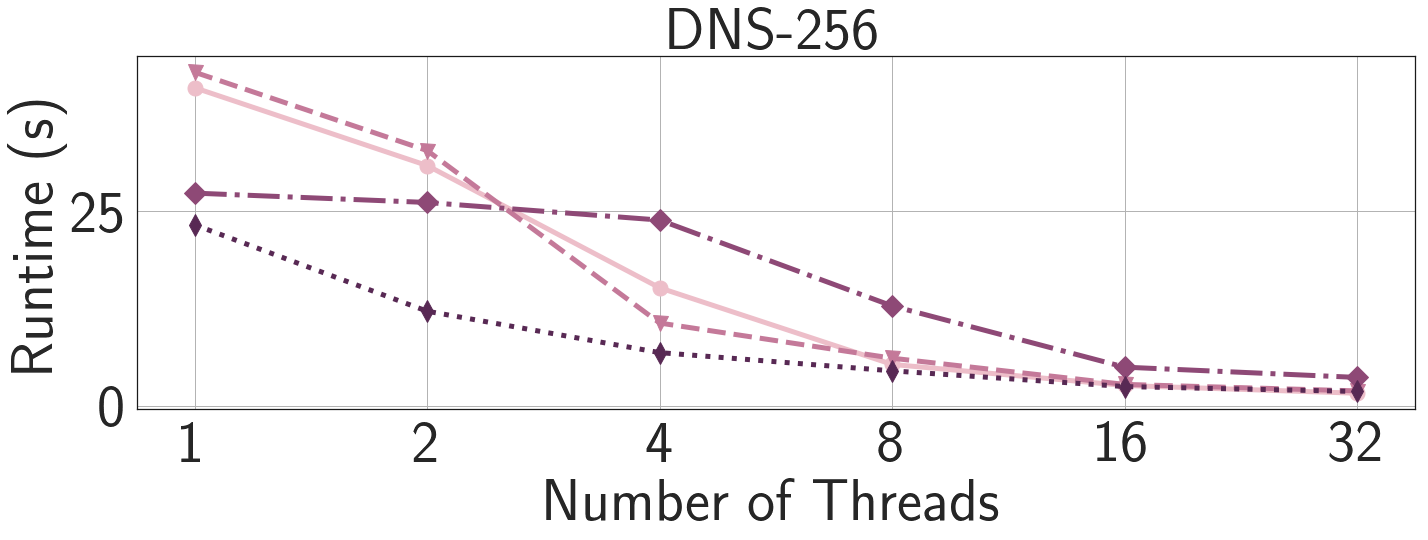

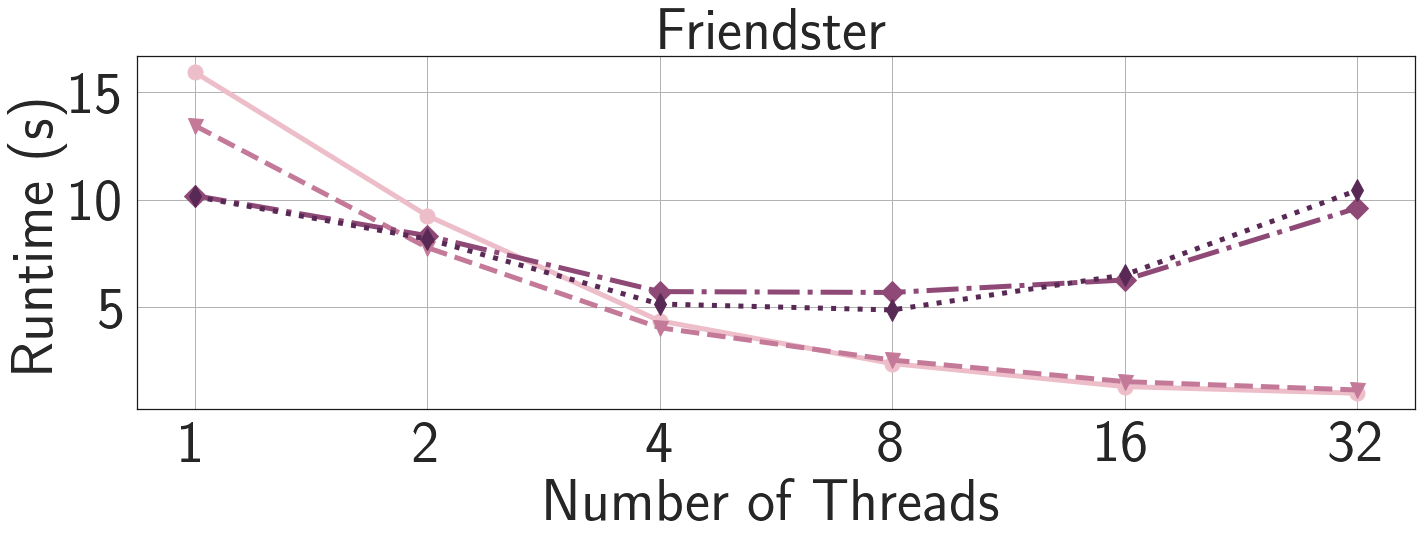

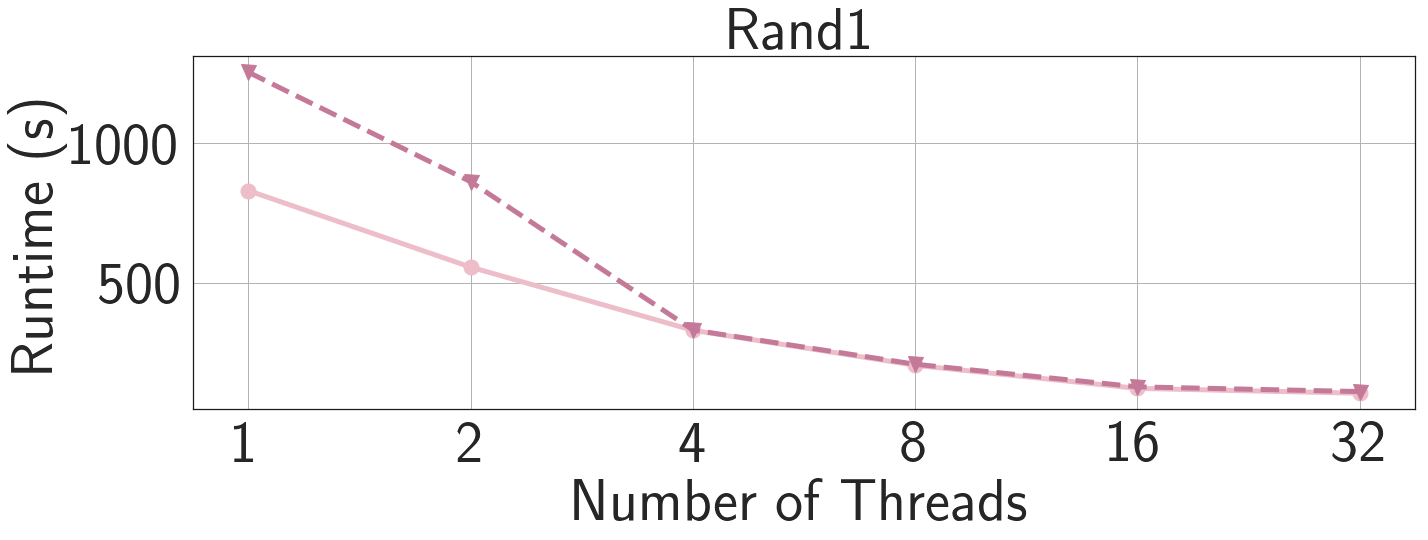

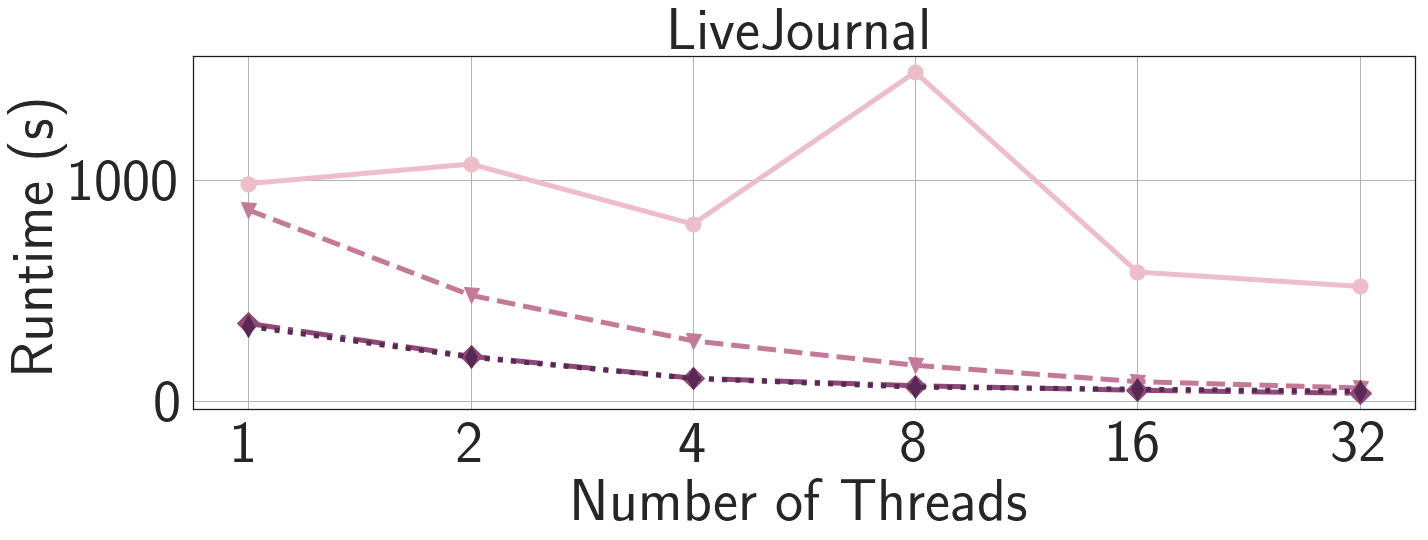

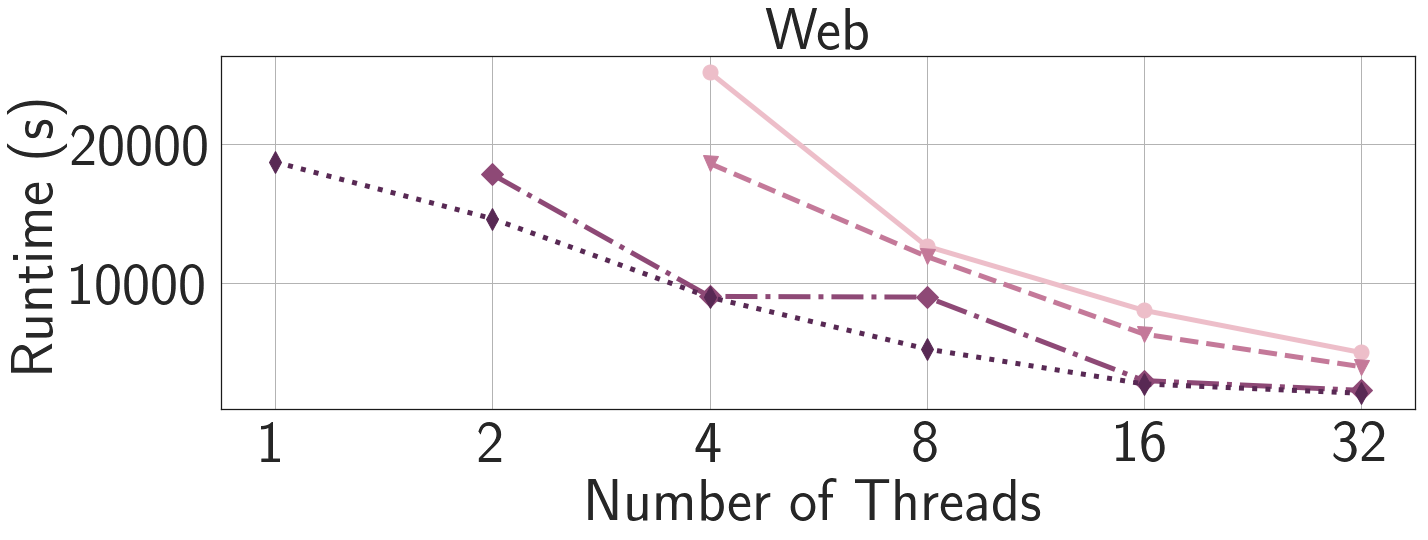

In [3]:
def draw_lines(loc, name, num_colors, ylim = []):
    #read file
    df = pd.read_csv(loc + name + '.csv', delimiter=',')
    
    sns.set()
    #style must be one of white, dark, whitegrid, darkgrid, ticks
    sns.set_style("whitegrid", {'grid.color': '.7', 'grid.linestyle': u'-', \
                                'axes.edgecolor': '.1', 'patch.force_edgecolor': True})
    palette = sns.cubehelix_palette(n_colors=num_colors, start=0, rot=0.3, gamma=2.1, \
                                hue=0.9, light=0.9, dark=0.5, reverse = False, as_cmap=False)
    # draw bar palette to show the color
    #sns.palplot(palette)
    sns.set_palette(palette)
    
    #set canvas
    font_size = 60
    fig = plt.figure(figsize = (20,8.5))
    fig.canvas.draw()
    
    xaxis_tick = [0, 1, 2, 3, 4, 5]
    xaxis_range = ['1', '2', '4', '8', '16', '32']
    #xaxis_tick = [1, 2, 4, 8, 16, 32]
    
    from matplotlib import ticker 
    ax = plt.subplot(111)
    
    #set title
    ax.set_title(name, fontsize = font_size)
    
    #set x axis
    ax.tick_params(labelsize = font_size)
    ax.set_xticks(xaxis_tick)
    ax.set_xticklabels(xaxis_range, rotation=0) 
    #ax.set_xscale('log', basex=2)
    ax.set_xlabel('Number of Threads', fontsize = font_size)
    
    #set y axis
    ax.set_ylabel('Runtime (s)', fontsize = font_size)
    ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
    if [] != ylim:
        ax.set_ylim(ylim)
    from matplotlib.ticker import FormatStrFormatter
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
    

    from itertools import cycle
    linecycler = cycle(["-","--","-.",":"])
    markercycler = cycle(['o', 'v', 'D', 'd', 'p', 's'])
    
    for column in df.columns:
        if 'thread' == column: continue;    
        ax.plot(df[column], linestyle = next(linecycler), marker = next(markercycler), \
                             markersize=15, linewidth=5)

    #set legend
    '''
    leg = fig.legend(ax.lines, df.columns[1:], ncol = 1, frameon=True, fancybox = True, \
                    prop={'size':font_size}, shadow = False, framealpha=0.1, bbox_to_anchor = (1.28, .83))
    #                 loc = 'upper center')
    leg.get_frame().set_edgecolor('k')
    leg.get_frame().set_linewidth(1)
    '''
    plt.tight_layout()
    plt.subplots_adjust(top = 0.8)
    plt.show()
    fig.savefig(loc + name + '.pdf', format = 'pdf', bbox_inches='tight')
    fig.savefig(loc + name + '.eps', format = 'eps', dpi = fig.dpi, bbox_inches='tight')
    return ax.lines, df.columns[1:]

loc = 'map_results/'
files = ['com-Orkut',  'DNS-256', 'Friendster', 
         'Rand1','LiveJournal', 'Web']
#files = ['12month1', 'com-Orkut', 'DNS-128', 'DNS-256', 'Friendster', 
#         'Orkut-group', 'Rand1', 'Rand3', 'LiveJournal']
for file in files:
    draw_lines(loc, file, 4)
    

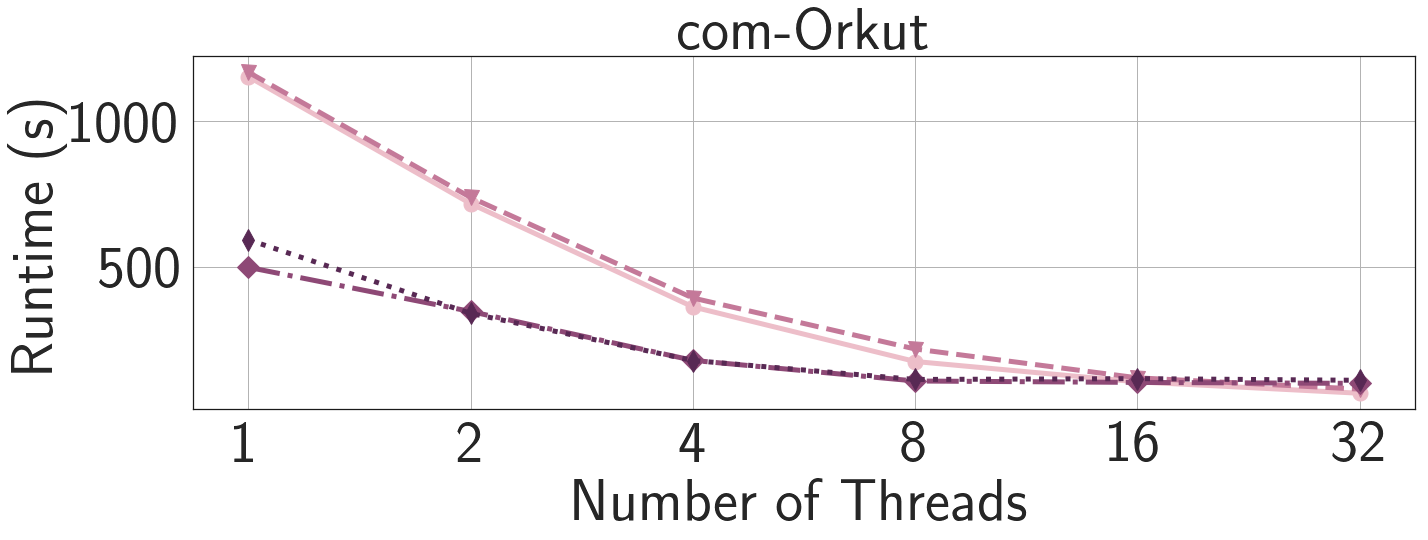

<Figure size 144x72 with 0 Axes>

In [7]:

lines, headers = draw_lines(loc, 'com-Orkut', 4)

fig = plt.figure(figsize = (2,1))
fig.canvas.draw()

leg = fig.legend(lines, headers, ncol = 4, frameon=True, fancybox = True, \
                    prop={'size':60}, shadow = False, framealpha=0.1, #bbox_to_anchor = (1, 1))
                     loc = 'center')
leg.get_frame().set_edgecolor('k')
leg.get_frame().set_linewidth(1)

plt.tight_layout()
#plt.subplots_adjust(top = 0.8)
plt.subplots_adjust(top=0.99, right=0.99)
plt.show()

fig.savefig('legend.pdf', format = 'pdf', bbox_inches='tight')
fig.savefig('legend.eps', format = 'eps', dpi = fig.dpi, bbox_inches='tight')

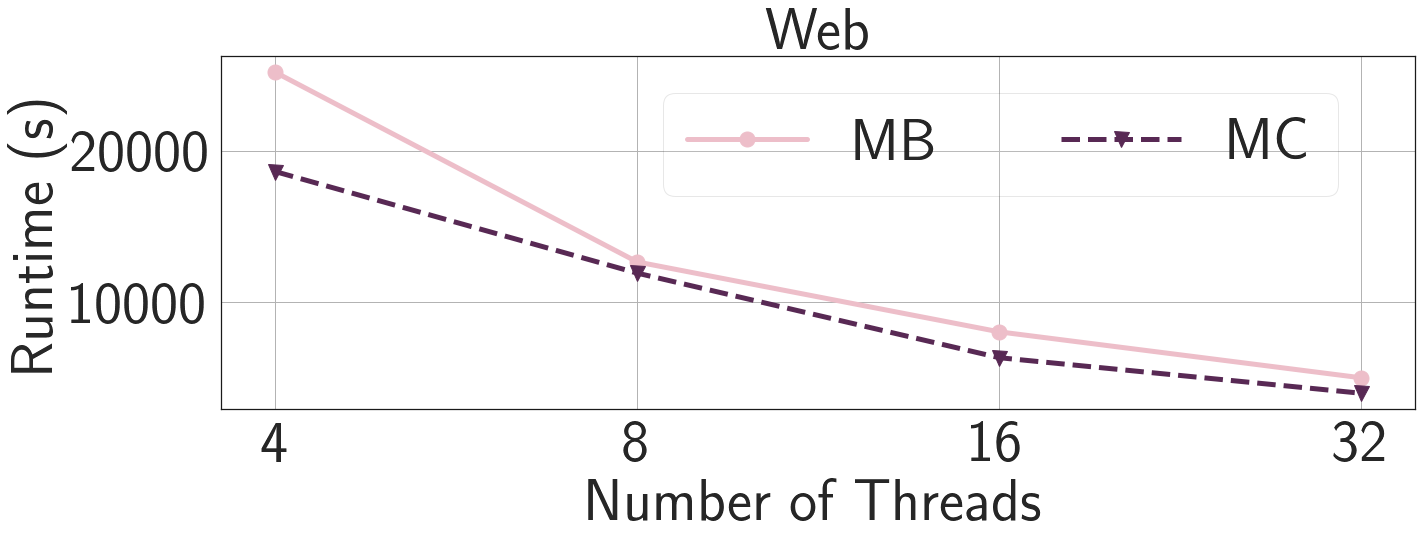

In [37]:


def draw_web_lines(loc, name, num_colors, ylim = []):
    #read file
    df = pd.read_csv(loc + name + '.csv', delimiter=',')
    
    sns.set()
    #style must be one of white, dark, whitegrid, darkgrid, ticks
    sns.set_style("whitegrid", {'grid.color': '.7', 'grid.linestyle': u'-', \
                                'axes.edgecolor': '.1', 'patch.force_edgecolor': True})
    palette = sns.cubehelix_palette(n_colors=num_colors, start=0, rot=0.3, gamma=2.1, \
                                hue=0.9, light=0.9, dark=0.5, reverse = False, as_cmap=False)
    # draw bar palette to show the color
    #sns.palplot(palette)
    sns.set_palette(palette)
    
    #set canvas
    font_size = 60
    fig = plt.figure(figsize = (20,8.5))
    fig.canvas.draw()
    
    xaxis_tick = [0, 1, 2, 3]
    xaxis_range = ['4', '8', '16', '32']
    #xaxis_tick = [1, 2, 4, 8, 16, 32]
    
    from matplotlib import ticker 
    ax = plt.subplot(111)
    
    #set title
    ax.set_title(name, fontsize = font_size)
    
    #set x axis
    ax.tick_params(labelsize = font_size)
    ax.set_xticks(xaxis_tick)
    ax.set_xticklabels(xaxis_range, rotation=0) 
    #ax.set_xscale('log', basex=2)
    ax.set_xlabel('Number of Threads', fontsize = font_size)
    
    #set y axis
    ax.set_ylabel('Runtime (s)', fontsize = font_size)
    ax.get_yaxis().set_major_formatter(ticker.ScalarFormatter())
    if [] != ylim:
        ax.set_ylim(ylim)
    from matplotlib.ticker import FormatStrFormatter
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.f'))
    

    from itertools import cycle
    linecycler = cycle(["-","--","-.",":"])
    markercycler = cycle(['o', 'v', 'D', 'd', 'p', 's'])
    
    for column in df.columns:
        if 'thread' == column: continue;    
        ax.plot(df[column], linestyle = next(linecycler), marker = next(markercycler), \
                             markersize=15, linewidth=5)

    #set legend
    leg = fig.legend(ax.lines, df.columns[1:], ncol = num_colors, frameon=True, fancybox = True, \
                    prop={'size':font_size}, shadow = False, framealpha=0.1, bbox_to_anchor = (0.95, .78))
    #                 loc = 'upper center')
    leg.get_frame().set_edgecolor('k')
    leg.get_frame().set_linewidth(1)
    
    plt.tight_layout()
    plt.subplots_adjust(top = 0.8)
    plt.show()
    fig.savefig(loc + name + '.pdf', format = 'pdf', bbox_inches='tight')
    fig.savefig(loc + name + '.eps', format = 'eps', dpi = fig.dpi, bbox_inches='tight')
    return

draw_web_lines(loc, 'Web', 2)